# Module 6 Live Coding Assignment:
## Logistic Regression and Applying GLM

#### Dempsey Wade

In [184]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import metrics

## Q1

#### Read the dataset “churn.csv” and save it in a variable called “df”. See the basic infor- mation about your data with “head()”, “info()”, “describe()”, “dtypes” and ”shape”.

In [185]:
df = pd.read_csv('/Users/dwade/Desktop/dartmouth/LiveCodingAssignments/churn.csv')

In [186]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [188]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [189]:
df.shape

(7043, 21)

In [190]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Q2
#### Cast the variable ”TotalCharges” to a float. Make sure to use the argument errors=‘coerce’. 

#### Delete rows, including null values, and drop the “CustomerID” column. 

#### Replace relevant columns to integers. For “Gender”, use 1 for “Male” and 0 for “Female”. For the others, use 1 for “Yes” and 0 for “No”.

In [191]:
# Make Total Charges a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [192]:
#drop null rows
df = df.dropna(axis = 0)

#Prove we have no null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [193]:
#Replace column values with 1's and 0's
df['gender'].replace('Male', 1, inplace=True)
df['gender'].replace('Female', 0,inplace=True)
print(df['gender'].dtypes)
df['gender'].head()

int64


0    0
1    1
2    1
3    1
4    0
Name: gender, dtype: int64

In [194]:
#Replace column values with 1's and 0's, continued
df.replace(['Yes', 'No'], [1,0], inplace=True)

In [195]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## Q3
#### Perform an univariate analysis for all categorical and continuous variables. Plot their distributions using histograms in seaborn. 

#### Then do a “pairplot” for the columns “tenure”, “MonthlyCharges” and “TotalCharges” with the hue=“Churn” in seaborn.

In [196]:
import seaborn as sns

In [197]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [198]:
#New Dataframe to perform histograms on
hist = df[['Dependents', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']].copy()
hist.head()

,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,1,1,29.85,29.85
1,0,34,0,56.95,1889.50
2,0,2,1,53.85,108.15
3,0,45,0,42.30,1840.75
4,0,2,1,70.70,151.65


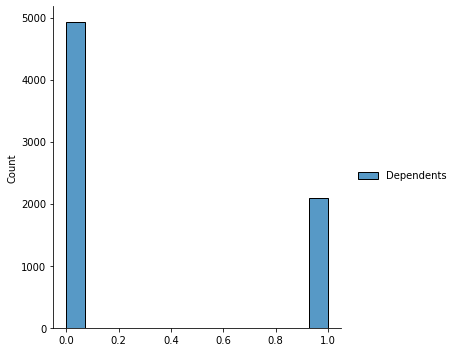

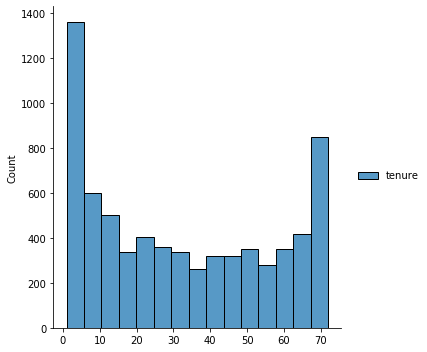

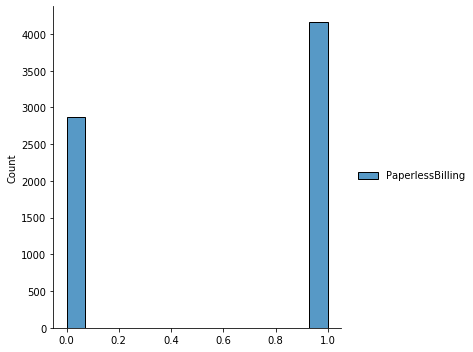

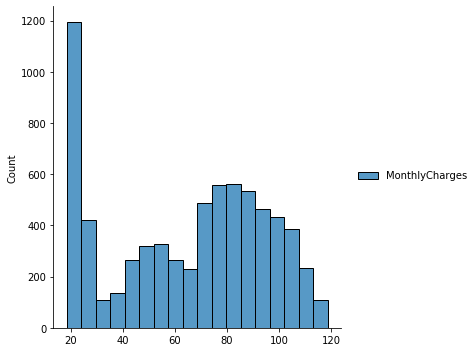

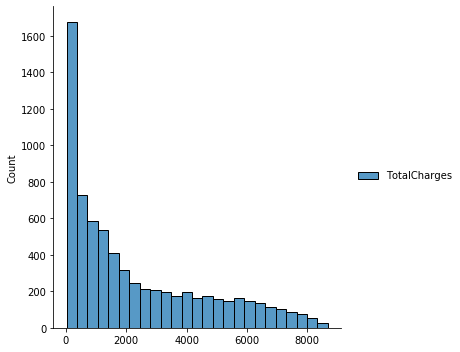

In [199]:
#Loop through dataframe's columns and perform histogram on 
# each variable
for i in hist.columns:
    sns.displot(df[[i]], kind='hist')

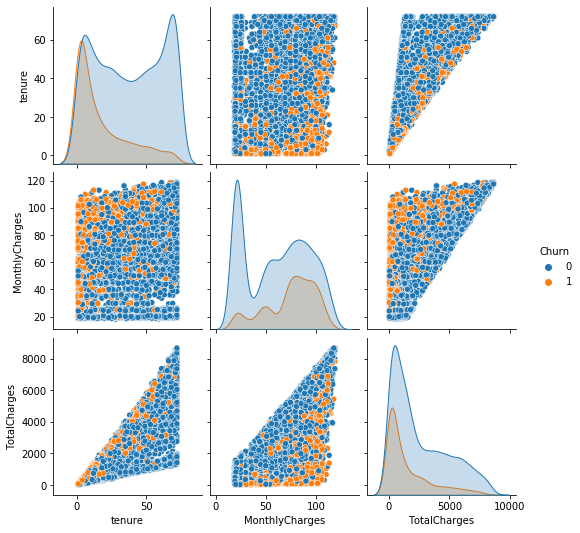

In [200]:
#Create a new dataframe for the sns pairplot
df2 = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy() #'MonthlyCharges']
df2.head()
sns.pairplot(df2, hue ='Churn')

## Q4
#### Get and plot the correlation matrix between “Churn” and the remaining columns.

In [201]:
import matplotlib.pyplot as plt

In [202]:
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.011902,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691
PaperlessBilling,-0.011902,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454
MonthlyCharges,-0.013779,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858
TotalCharges,0.000048,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484
Churn,-0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000


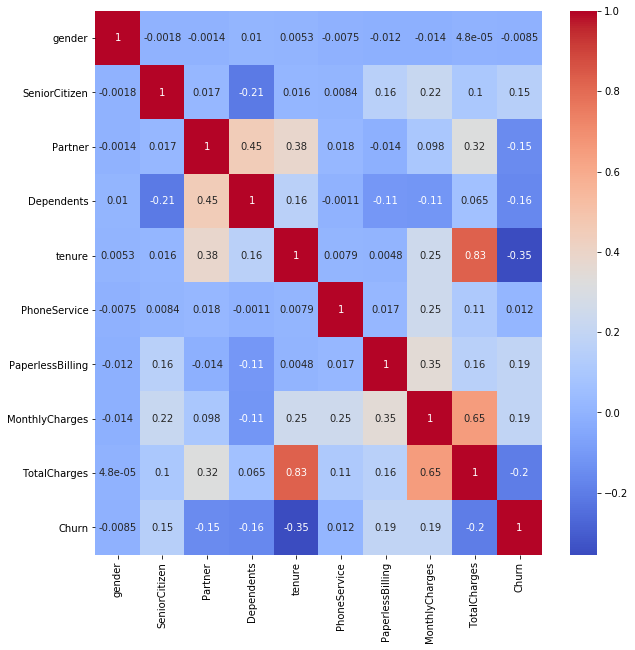

In [203]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor, cbar = True, cmap = 'coolwarm', annot=True, ax =ax)

## Q5
#### Seperate X and y values. y would be our class which is “Churn” column in this dataset. X would be the remaining columns. Also, apply normalization to x in order to scale all values between 0 and 1.

In [216]:
#Before I convert to categorical variables 
df = df.replace('No internet service',2)

X = df.drop(['Churn', 'customerID', 'MultipleLines',\
             'InternetService','Contract','PaymentMethod'\
            ], axis=1)
y = df['Churn']

X.head(12) #I chose 12 so we can see 'OnlineSecurity' value at 11 is 2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85
1,1,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.50
2,1,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15
3,1,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65
5,0,0,0,0,8,1,0,0,1,0,1,1,1,99.65,820.50
6,1,0,0,1,22,1,0,1,0,0,1,0,1,89.10,1949.40
7,0,0,0,0,10,0,1,0,0,0,0,0,0,29.75,301.90
8,0,0,1,0,28,1,0,0,1,1,1,1,1,104.80,3046.05
9,1,0,0,1,62,1,1,1,0,0,0,0,0,56.15,3487.95


In [217]:
#We don't want to normalize the columns that have a value of 2, 
#so we will convert to categorical
X['OnlineSecurity'] = X['OnlineSecurity'].astype('category')
X['OnlineBackup'] = X['OnlineBackup'].astype('category')
X['DeviceProtection'] = X['DeviceProtection'].astype('category')
X['TechSupport'] = X['TechSupport'].astype('category')
X['StreamingTV'] = X['StreamingTV'].astype('category')
X['StreamingMovies'] = X['StreamingMovies'].astype('category')

X.dtypes

gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
PaperlessBilling       int64
MonthlyCharges       float64
TotalCharges         float64
dtype: object

In [220]:
#Normalize the columns, but drop the categorical. 
#No need to worry about columns such as gender which will remain unchanged
X_norm = X.drop(['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',\
                'StreamingMovies','StreamingTV'], axis=1)

print(X_norm.columns)

for i in X_norm.columns:
    X_norm[i] = (X_norm[i] - X_norm[i].min()) / (X_norm[i].max() - X_norm[i].min())
    
#Proof of normalization, should be max of 1 and min of 0
for i in X_norm.columns:
    print("Max in", i, ":", X_norm[i].max())
    print("Min in", i, ":", X_norm[i].min())
    X[i] = X_norm[i] #Place the normalized columns back into X


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')
Max in gender : 1.0
Min in gender : 0.0
Max in SeniorCitizen : 1.0
Min in SeniorCitizen : 0.0
Max in Partner : 1.0
Min in Partner : 0.0
Max in Dependents : 1.0
Min in Dependents : 0.0
Max in tenure : 1.0
Min in tenure : 0.0
Max in PhoneService : 1.0
Min in PhoneService : 0.0
Max in PaperlessBilling : 1.0
Min in PaperlessBilling : 0.0
Max in MonthlyCharges : 1.0
Min in MonthlyCharges : 0.0
Max in TotalCharges : 1.0
Min in TotalCharges : 0.0


## Q6
#### Use the RFE method to get the best 8 variables for predicting the Churn. Make sure to transform the final data to only use those variables for predicting. Finally split the data set as train and test with %80-%20 ratio.

In [221]:
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [222]:
lr = linear_model.LinearRegression()
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X, y)
print(sorted(zip(map(lambda x: x, rfe.ranking_), X.columns)))

[(1, 'MonthlyCharges'), (1, 'OnlineSecurity'), (1, 'PaperlessBilling'), (1, 'SeniorCitizen'), (1, 'StreamingMovies'), (1, 'TechSupport'), (1, 'TotalCharges'), (1, 'tenure'), (2, 'StreamingTV'), (3, 'Dependents'), (4, 'PhoneService'), (5, 'DeviceProtection'), (6, 'OnlineBackup'), (7, 'gender'), (8, 'Partner')]


In [225]:
#From the above, we can see the top 8 variables are:
# - MonthlyCharges
# - OnlineSecurity
# - PaperlessBilling
# - SeniorCitizen
# - StreamingMovies
# - TechSupport
# - TotalCharges
# - tenure

#Now we chance our X to only contain these 8 variables
X2 = X[['MonthlyCharges','OnlineSecurity','PaperlessBilling','SeniorCitizen',\
       'StreamingMovies','TechSupport','TotalCharges','tenure']]
X = X2.copy()

X.head(10)

,MonthlyCharges,OnlineSecurity,PaperlessBilling,SeniorCitizen,StreamingMovies,TechSupport,TotalCharges,tenure
0,0.115423,0,1.0,0.0,0,0,0.001275,0.000000
1,0.385075,1,0.0,0.0,0,0,0.215867,0.464789
2,0.354229,1,1.0,0.0,0,0,0.010310,0.014085
3,0.239303,1,0.0,0.0,0,1,0.210241,0.619718
4,0.521891,0,1.0,0.0,0,0,0.015330,0.014085
5,0.809950,0,1.0,0.0,1,0,0.092511,0.098592
6,0.704975,0,1.0,0.0,0,0,0.222779,0.295775
7,0.114428,1,0.0,0.0,0,0,0.032668,0.126761
8,0.861194,0,1.0,0.0,1,1,0.349325,0.380282
9,0.377114,1,0.0,0.0,0,0,0.400317,0.859155


In [234]:
#Split into test, train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Q7
#### Build a logistic regression model using the selected variables from above. Fit it with your training data and then see the predictions in your test data. Get the accuracy for your model and plot the ROC curve for it.

In [242]:
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [246]:
# Check the MAE, MSE, and RMSE
print("MAE:", metrics.mean_absolute_error(y_test, pred))
print("MSE:", metrics.mean_squared_error(y_test, pred))
print("RMSE:", metrics.mean_squared_error(y_test, pred, squared = False))

#They are high 

MAE: 0.19545131485429992
MSE: 0.19545131485429992
RMSE: 0.4420987614258831


In [249]:
y_test
metrics.accuracy_score(y_test, pred)

0.8045486851457001

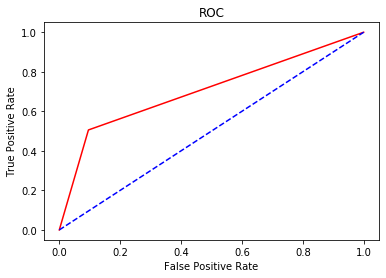

In [275]:
# Plot roc curve
preds = pred[:]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'r')
plt.plot([0, 1], [0, 1],'b--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

In [259]:
y_test.shape

(1407,)

In [260]:
pred.shape

(1407,)